# Construct Network from Data
data : https://drive.google.com/file/d/1RHP6nYuQphjXhqCeb1Nt22irwN6QSvvn/view

## Quaker's Network 
Before there were Facebook friends, there was the Society of Friends, known as the Quakers. Founded in England in the mid-seventeenth century, the Quakers were Protestant Christians who dissented from the official Church of England and promoted broad religious toleration, preferring Christians’ supposed “inner light” and consciences to state-enforced orthodoxy. Quakers’ numbers grew rapidly in the mid- to late-seventeenth century and their members spread through the British Isles, Europe, and the New World colonies—especially Pennsylvania, founded by Quaker leader William Penn and the home of your four authors.

Since scholars have long linked Quakers’ growth and endurance to the effectiveness of their networks, the data used in this tutorial is a list of names and relationships among the earliest seventeenth-century Quakers. This dataset is derived from the Oxford Dictionary of National Biography and from the ongoing work of the Six Degrees of Francis Bacon project, which is reconstructing the social networks of early modern Britain (1500-1700)

#### Read Data

In [1]:
import networkx as nx
# To visualize in jupyter
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
nodes_data = pd.read_csv('quakers_nodelist.csv')

In [4]:
nodes_data[:5]

,Name,Historical Significance,Gender,Birthdate,Deathdate,ID
0,Joseph Wyeth,religious writer,male,1663,1731,10013191
1,Alexander Skene of Newtyle,local politician and author,male,1621,1694,10011149
2,James Logan,colonial official and scholar,male,1674,1751,10007567
3,Dorcas Erbery,Quaker preacher,female,1656,1659,10003983
4,Lilias Skene,Quaker preacher and poet,male,1626,1697,10011152


In [8]:
edges_data = pd.read_csv('quakers_edgelist.csv')

In [9]:
edges_data[:10]

,Source,Target
0,George Keith,Robert Barclay
1,George Keith,Benjamin Furly
2,George Keith,Anne Conway Viscountess Conway and Killultagh
3,George Keith,Franciscus Mercurius van Helmont
4,George Keith,William Penn
5,George Keith,George Fox
6,George Keith,George Whitehead
7,George Keith,William Bradford
8,James Parnel,Benjamin Furly
9,James Parnel,Stephen Crisp


#### Construct Network

In [17]:
# construct nodes and edges
node_names=list(nodes_data['Name'])
edges = [(s,t) for s,t in zip(edges_data['Source'],edges_data['Target'])]

In [30]:
# Construct dictionaries for attributes
his_sig = nodes_data.set_index('Name')['Historical Significance'].to_dict()
gender = nodes_data.set_index('Name')['Gender'].to_dict()
birthdate = nodes_data.set_index('Name')['Birthdate'].to_dict()
deathdate = nodes_data.set_index('Name')['Deathdate'].to_dict()
id_dict = nodes_data.set_index('Name')['ID'].to_dict()

In [31]:
print(his_sig['Alexander Parker'])
print(gender['Alexander Parker'])
print(type(birthdate['Alexander Parker']))

Quaker preacher and author
male
<class 'int'>


In [51]:
# to avoid KeyError: <type 'numpy.int64'>
birthdate={i:int(x) for i,x in birthdate.items()}
deathdate={i:int(x) for i,x in deathdate.items()}
id_dict={i:int(x) for i,x in id_dict.items()}

In [52]:
print(type(birthdate['Alexander Parker']))

<class 'int'>


In [53]:
G = nx.Graph()
# add nodes and edges
G.add_nodes_from(node_names)
G.add_edges_from(edges)

In [54]:
G = nx.Graph()
# add nodes and edges
G.add_nodes_from(node_names)
G.add_edges_from(edges)
# set attributes
nx.set_node_attributes(G,his_sig,'historical_significance')
nx.set_node_attributes(G,gender,'gender')
nx.set_node_attributes(G,birthdate,'birthdate')
nx.set_node_attributes(G,deathdate,'deathdate')
nx.set_node_attributes(G,id_dict,'ID')

In [36]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 119
Number of edges: 174
Average degree:   2.9244


In [38]:
174*2 / 119

2.9243697478991595

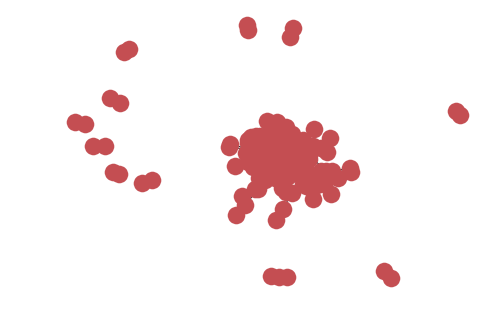

In [39]:
nx.draw(G)

### Visualization

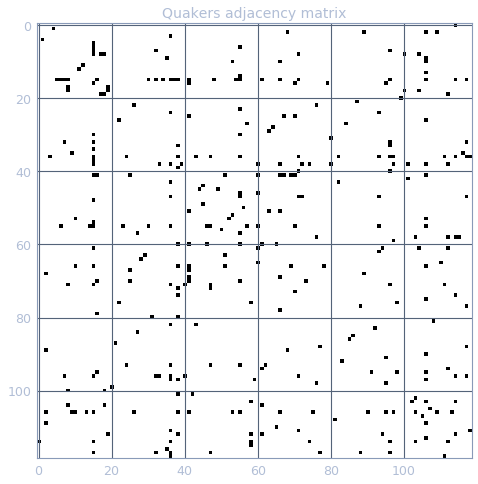

In [50]:
# show adjacency matrix
A = nx.to_numpy_matrix(G, dtype=np.bool)# adjacency matrix
plt.figure(1, figsize=(8, 8))# control figure size
plt.imshow(A,
           cmap="Greys",# color map
           interpolation="none"
           )
plt.title('Quakers adjacency matrix', fontsize=14);

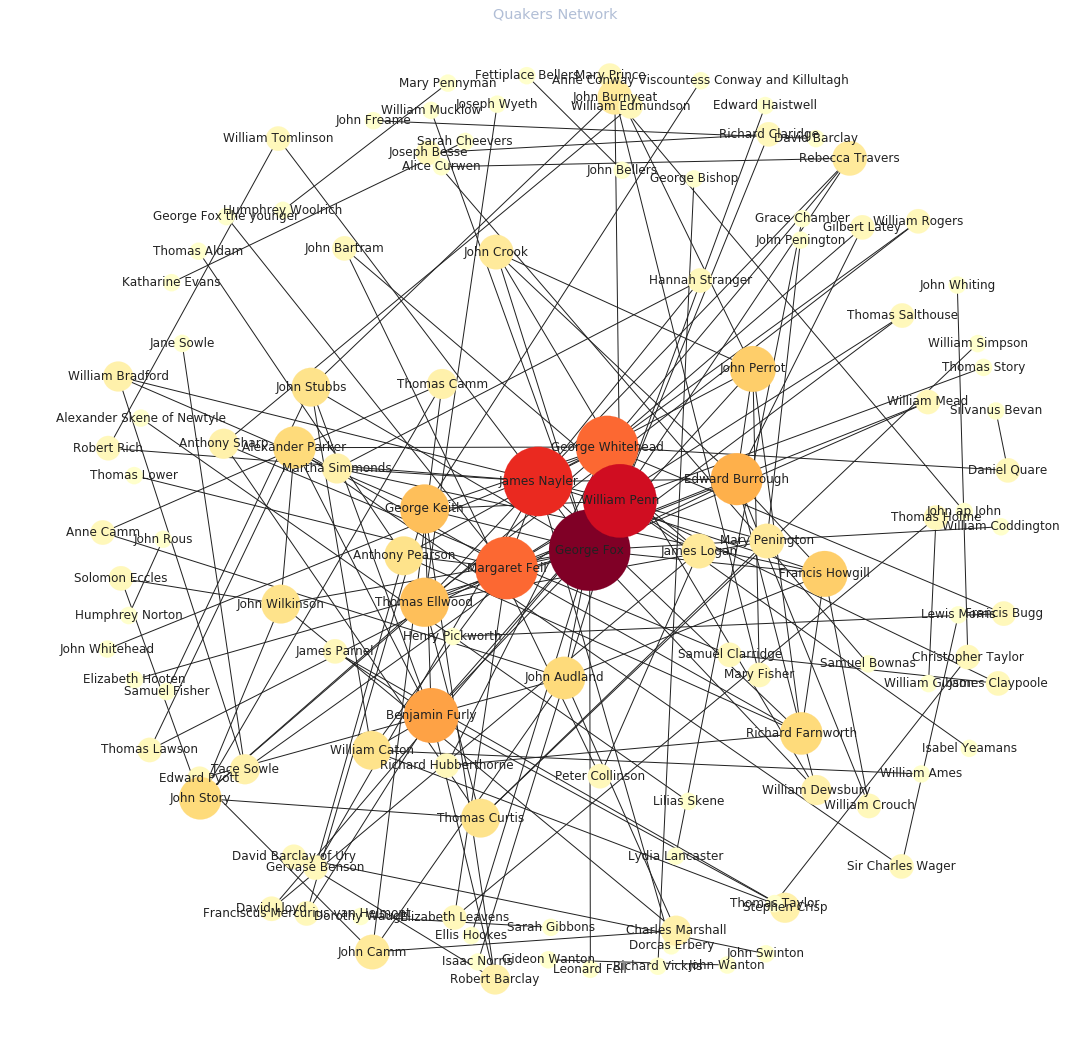

In [80]:
dig = dict(nx.degree(G)) # degree of network
d = np.array(list(dig.values()))
pos=nx.spring_layout(G,k=1) # positions for all nodes
plt.figure(figsize=(14,14)) #Control figure size
nx.draw(G,pos,with_labels=True
        ,node_size = d * 300 # node size
        ,node_color= d # data for label color
        ,font_size= 12 # labelsize
        ,cmap=plt.cm.YlOrRd # color_map
       )
plt.title('Quakers Network');
plt.savefig('Quaker.png', format="PNG") # Save figure

color map : http://pythonkim.tistory.com/82

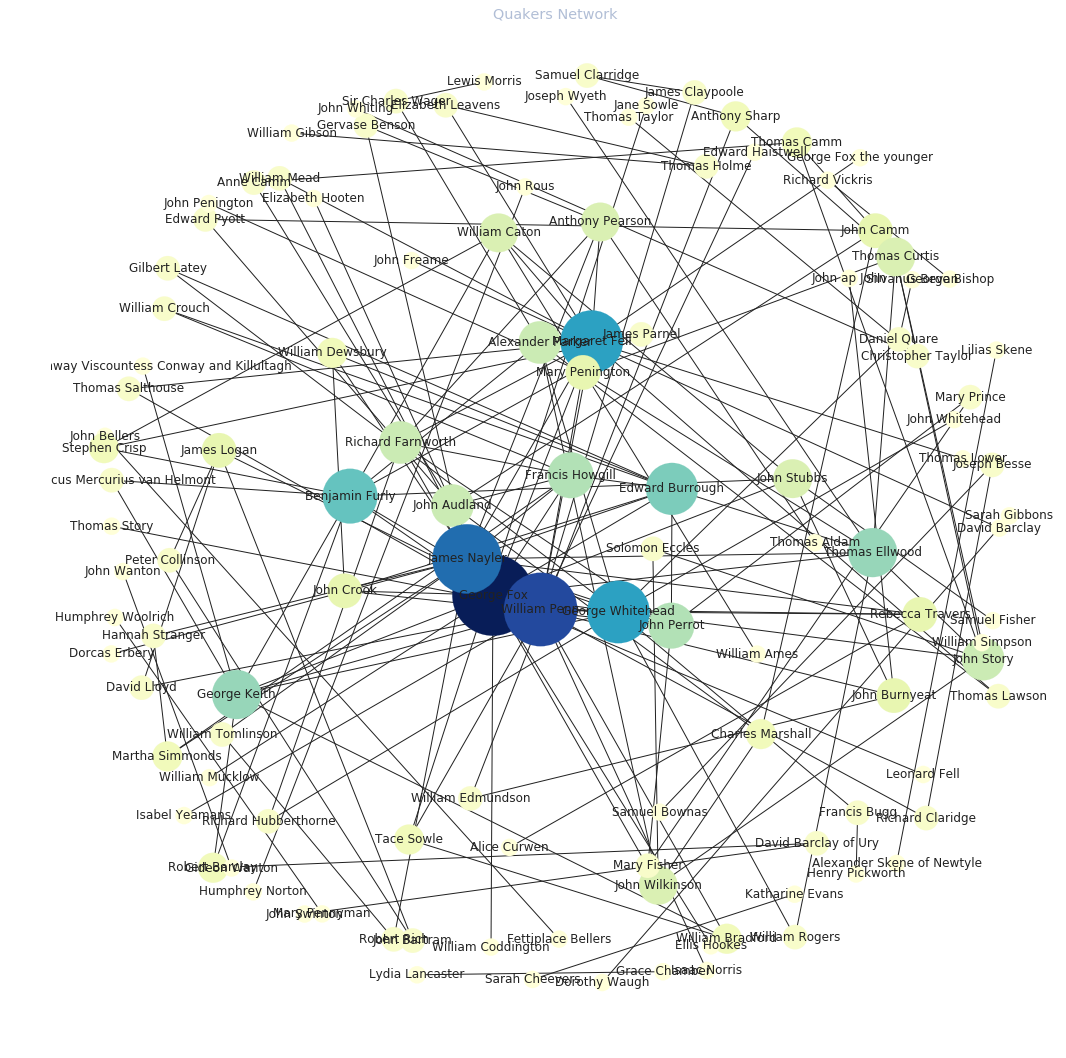

In [84]:
dig = dict(nx.degree(G)) # degree of network
pos=nx.spring_layout(G,k=1) # positions for all nodes
plt.figure(figsize=(14,14)) #Control figure size
nx.draw(G,pos,with_labels=True
        ,node_size = d * 300 # node size
        ,node_color= d # data for label color
        ,font_size=12 # labelsize
        ,cmap=plt.cm.YlGnBu # color_map
       )
plt.title('Quakers Network');
plt.savefig('Quaker.png', format="PNG") # Save figure

### Export data

In [90]:
nx.write_gexf(G, 'quaker_network.gexf')